In this project today, we will build our own classification model to understand "Employee Churn"

## Data import

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import squarify as sq

# Importing plotly and cufflinks in offline mode
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

from wordcloud import WordCloud

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

import datetime as dt
from datetime import datetime

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, PowerTransformer  
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 

from xgboost import XGBRegressor, XGBClassifier, plot_importance

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/Users/Arunabho/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/Arunabho/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [143]:
df = pd.read_csv('/Users/Arunabho/Downloads/HR_Dataset.csv')

In [144]:
df

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Departments   salary  
0                          0        sales     low  
1                          0        sales  medium  
2                          0        sales  medium  
3                          0        sales     low  
4                          0        sales     low  
...                      ...          ...     ...  
14994                      0      support     low  
14995                      0      support     low  
14996                      0      support     low  
14997                      0      support     low  
14998                      0      support     low  

[14999 rows x 10 columns]

In [4]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

No missing value detected

In [30]:
#handling duplicate values
def duplicate_values(df):
    print(colored("Duplicate check...", attrs = ['bold']), sep = '')
    print("There are", df.duplicated(subset = None, keep = 'first').sum(), "duplicated observations in the dataset.")
    duplicate_values = df.duplicated(subset = None, keep = 'first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep = 'first', inplace = True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs = ['bold']), sep = '')

In [31]:
from termcolor import colored
duplicate_values(df)
print(colored("Shape:", attrs = ['bold']), df.shape,'\n', colored('*'*100, 'red', attrs = ['bold']))

Duplicate check...
There are 3008 duplicated observations in the dataset.
3008 Duplicates were dropped!
****************************************************************************************************
Shape: (11991, 10) 
 ****************************************************************************************************


In [32]:
df['Departments '].fillna('Missing', inplace=True)

There has been a classification problem.
- We are going to make classification on the target variable "left".
- So a model will be built to get the best classification on the "left" column.
- Moreover, being balanced of "left" column or not will be take into consideration meticolously.
- The dataset has 10 columns and 11991 observations after dropping of duplicated observations.
- 8 columns contain numerical values and 2 columns contain categorical values.
- There seems to be no missing value.

In [147]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [146]:
df.columns = df.columns.str.strip()
print(df['Departments'])

0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: Departments, Length: 14999, dtype: object


## Feature engineering and selection

4.2 - The Examination of Features


In the given dataset, we have two types of employee one who stayed and another who left the company. So, we can divide data into two groups and compare their characteristics.

In [11]:
import plotly 
import plotly.express as px
fig = px.pie(df, values = df['left'].value_counts(), 
             names = (df['left'].value_counts()).index, 
             title = '"left" Column Distribution')
fig.show()

In [35]:
y = df['left']
print(f'Percentage of left-1: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} observations for left-1)\nPercentage of left-0: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} observations for left-0)')

Percentage of left-1: % 16.6 --> (1991 observations for left-1)
Percentage of left-0: % 83.4 --> (10000 observations for left-0)


'left' column has binary type values.
We have an imbalanced data.
Almost 17% of the employees didn't continue with the company and left.
1991 employees left.
Almost 83% of the employees continue with the company and didn't leave.
10000 employees didn't leave.

In [ ]:
#let's take a look at the impact of satisfaction level on employees left

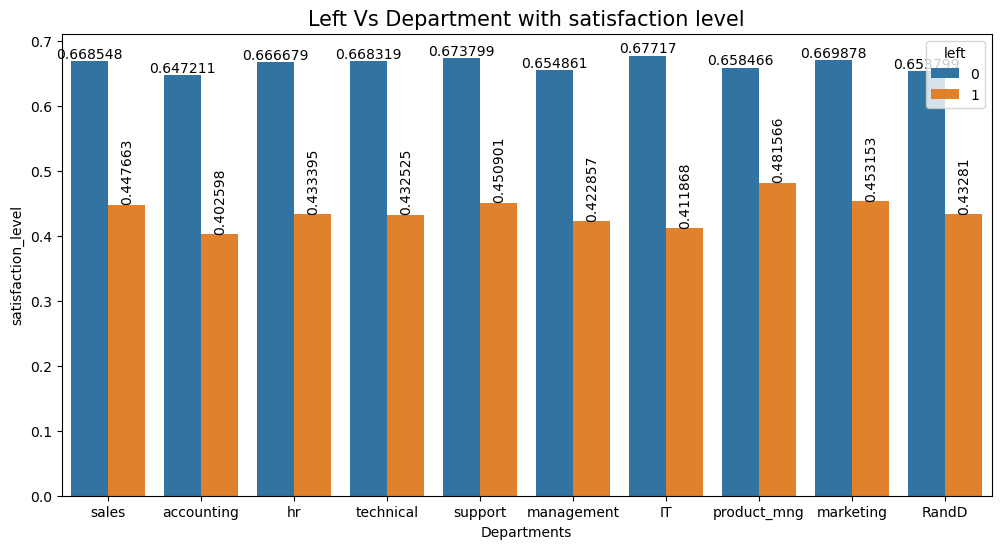

In [148]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='Departments', y='satisfaction_level', hue='left', data=df, ci=None)
g.bar_label(g.containers[0])
g.bar_label(g.containers[1], rotation=90)
plt.title("Left Vs Department with satisfaction level", size=15)
plt.show()

In [15]:
pd.crosstab(df['satisfaction_level'], df['left']).iplot(kind='bar', title = 'satisfaction_level and left')

Although it is expected that there should be a linear relationship between 'satisfaction_level' and 'left', it does not seem clearly on the graph due to the type of "left" feature.
- Those with a 'satisfaction_level' value of around 0.1 are more likely to be 'left'.
- There is a significant increase in the number of those labeled 'left' whose 'satisfaction_level' value is between 0.55. In fact, the number of those who left their companies exceeds that of the ones who not.
- When the 'satisfaction_level' value is around between 0.7 and 0.9, there is an increase in the number of those who left.
- Except for these intervals, no matter how low the satisfaction_level was, the employees continued their work.

In [ ]:
# let's take a look at the last evaluation and left

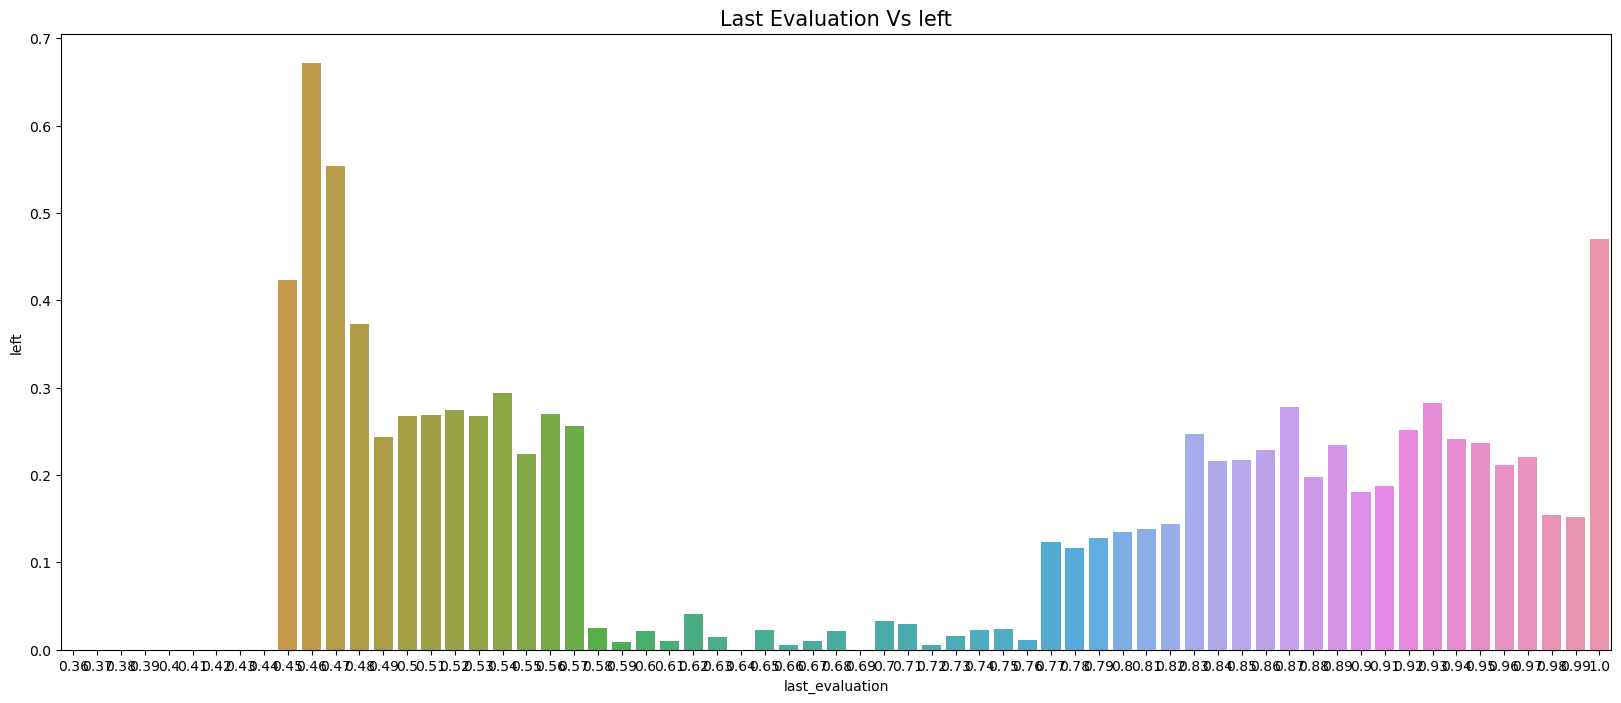

In [133]:
fig = plt.figure(figsize=(20,8))
sns.barplot(x='last_evaluation', y='left', data=df, ci=None)
plt.title("Last Evaluation Vs left", size=15)
plt.show()

In [134]:
pd.crosstab(df['last_evaluation'], df['left']).iplot(kind='bar', title = 'last_evaluation and left')

There is a local increase between 0.45-0.6 and 0.8-1 in the 'last_evaluation' values, as in 'satisfaction_level' values. There is an increase in the number of people who quit their jobs in these intervals.

In [ ]:
# Let's take a look at the impact of number of project 

In [135]:
fig = px.pie(df, values = df['number_project'].value_counts(), 
             names = (df['number_project'].value_counts()).index, 
             title = '"number_project" Column Distribution')
fig.show()

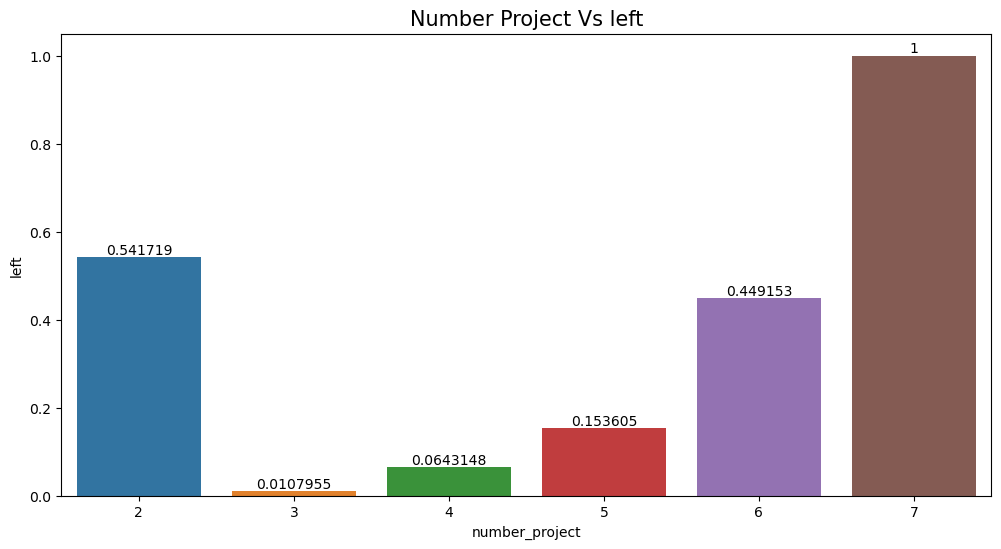

In [136]:
fig = plt.figure(figsize=(12,6))
g= sns.barplot(x='number_project', y='left', data=df, ci=None)
g.bar_label(g.containers[0])
plt.title("Number Project Vs left", size=15)
plt.show()

In [137]:
pd.crosstab(df['number_project'], df['left']).iplot(kind='bar', title = 'number_project and left')

It's clear that the employees who made 2, 6 and 7 projects are more inclined to leave their works. It's normal to expect employees who made more projects but not getting more salary or feeling more satisfaction to leave their works;however, those who left even though making less projects should be scrutinized more meticulously.

In [ ]:
# average monthly hours can be another grave issue

In [138]:
pd.crosstab(df['average_montly_hours'], df['left']).iplot(kind='bar', title = 'average_montly_hours and left')

- Looking at the 'average_montly_hours' values, there is a local increase in turnover in the 125-160 month working hours range and 210-290 monthly working hours.
- Those who work more than 290 hours per month are more likely to quit their jobs than those who do not.

In [ ]:
#now it's time to take a look at the work accidents

In [139]:
fig = px.pie(df, values = df['Work_accident'].value_counts(), 
             names = (df['Work_accident'].value_counts()).index, 
             title = '"Work_accident" Column Distribution')
fig.show()

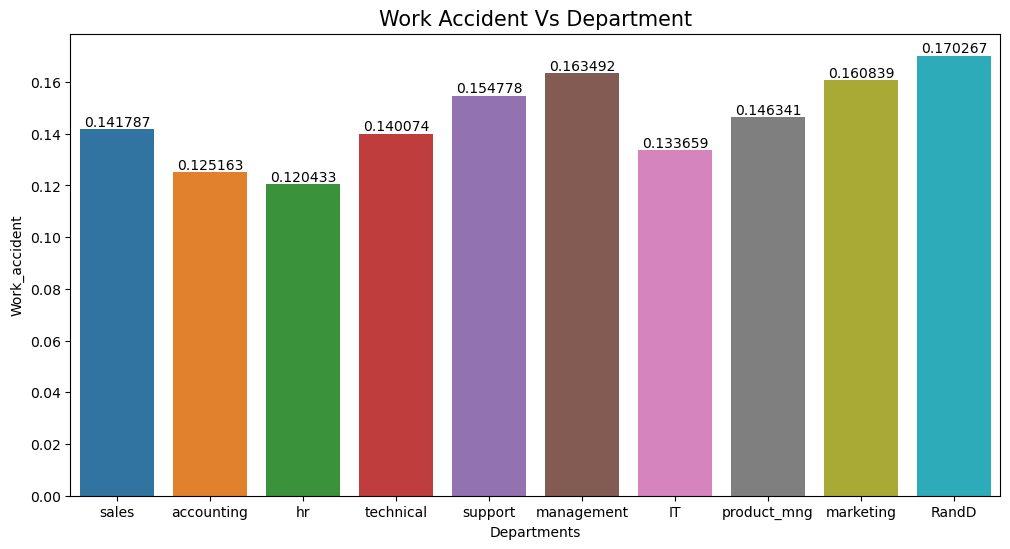

In [149]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='Departments', y='Work_accident', data=df, ci=None)
g.bar_label(g.containers[0])
plt.title("Work Accident Vs Department", size=15)
plt.show()

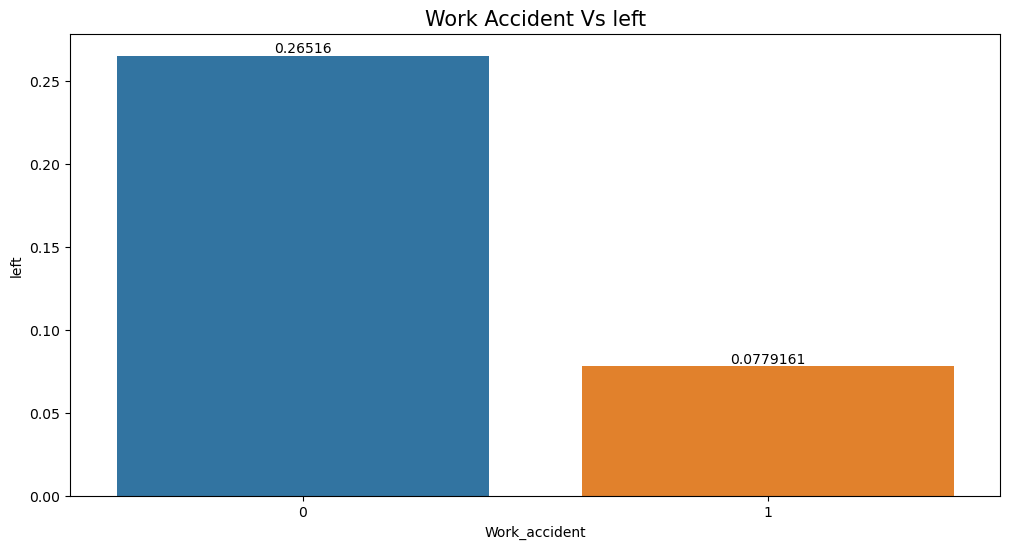

In [150]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='Work_accident', y='left', data=df, ci=None)
g.bar_label(g.containers[0])
plt.title("Work Accident Vs left", size=15)
plt.show()

In [151]:
pd.crosstab(df['Work_accident'], df['left']).iplot(kind='bar', title = 'work_accident and left')

- 'work_accident' column has binary type values. - While the employees who don't get involved in accident are more likely to leave with a value of 22.84%, those who get involved in accident are less likely to leave with a value of 6.02%.
- Altough it does not appear to be a determining factor and needs to be examined carefully by looking at the conditions at workplace, companies' policies and etc.; in fact, it could be said that the left rate of those who have got involved in a work accident is proportionally lower than those who did NOT.

In [ ]:
#now it's time for promotion data

In [152]:
fig = px.pie(df, values = df['promotion_last_5years'].value_counts(), 
             names = (df['promotion_last_5years'].value_counts()).index, 
             title = '"promotion_last_5years" Column Distribution')
fig.show()

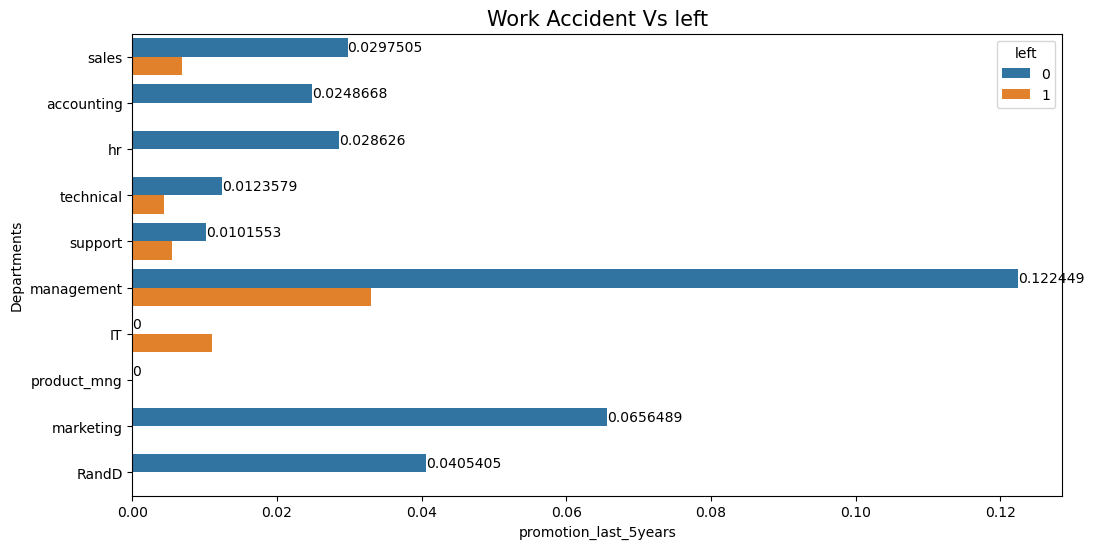

In [153]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='promotion_last_5years', y='Departments', hue='left', data=df, ci=None)
g.bar_label(g.containers[0])
plt.title("Work Accident Vs left", size=15)
plt.show()

In [154]:
pd.crosstab(df['promotion_last_5years'], df['left']).iplot(kind='bar', title = 'promotion_last_5years and left')

In [ ]:
#lastly, we will take a look at departments

In [155]:
fig = px.pie(df, values = df['Departments'].value_counts(), 
             names = (df['Departments'].value_counts()).index, 
             title = '"Departments" Column Distribution')
fig.show()

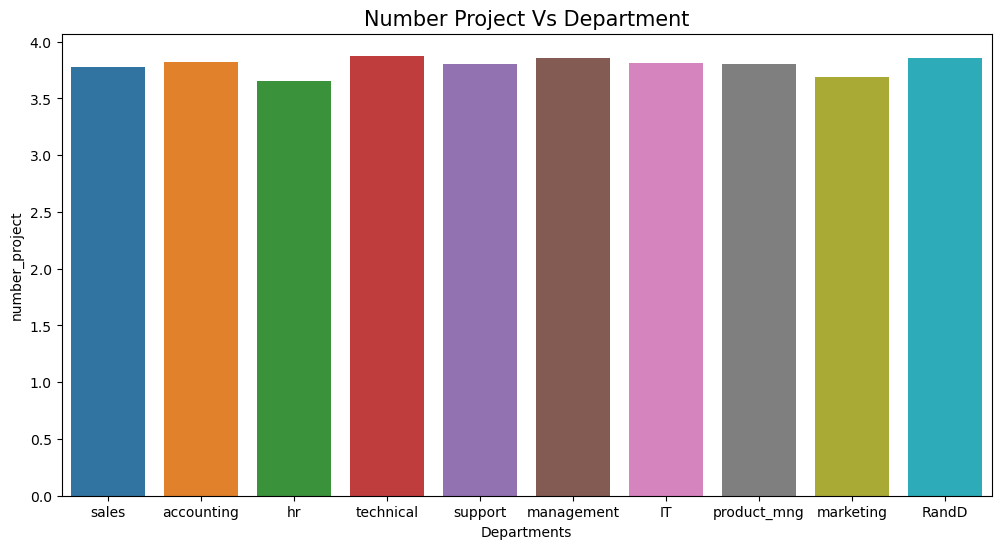

In [156]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='Departments', y='number_project', data=df, ci=None)
plt.title("Number Project Vs Department", size=15)
plt.show()

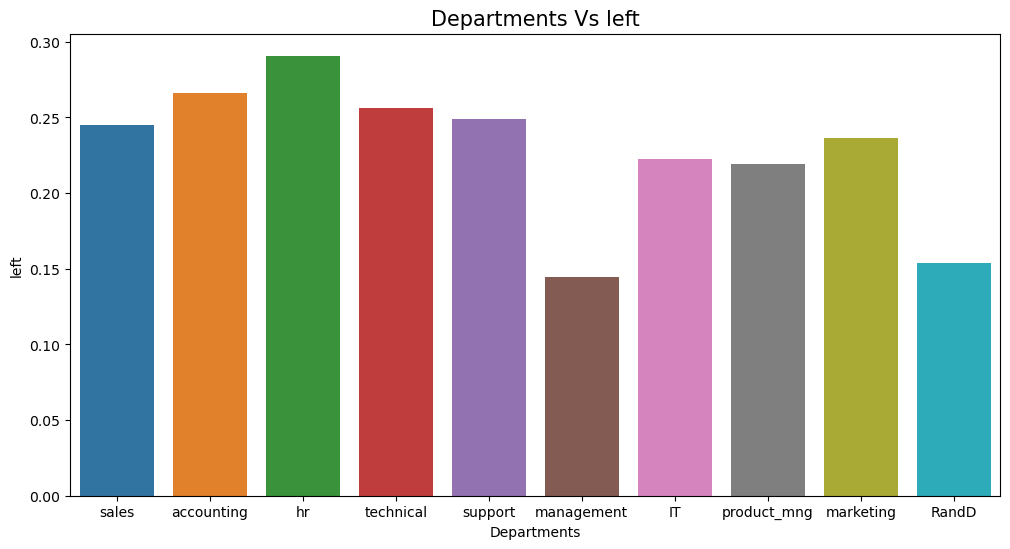

In [157]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='Departments', y='left', data=df, ci=None)
plt.title("Departments Vs left", size=15)
plt.show()

In [158]:
pd.crosstab(df['Departments'], df['left']).iplot(kind='bar', title = 'Departments and left')

- It is not observed that the departments which require the employees to work alone have an effect on the decision of "left".
- It is seen that the left percentages of the departments are quite similar.

In [159]:
#For salary
fig = px.pie(df, values = df['salary'].value_counts(), 
             names = (df['salary'].value_counts()).index, 
             title = '"salary" Column Distribution')
fig.show()

In [160]:
pd.crosstab(df['salary'], df['left']).iplot(kind='bar', title = 'salary and left')

## cluster analysis

In [ ]:
#a clear cluster analysis would show the segragation between the sentiments of the employees.

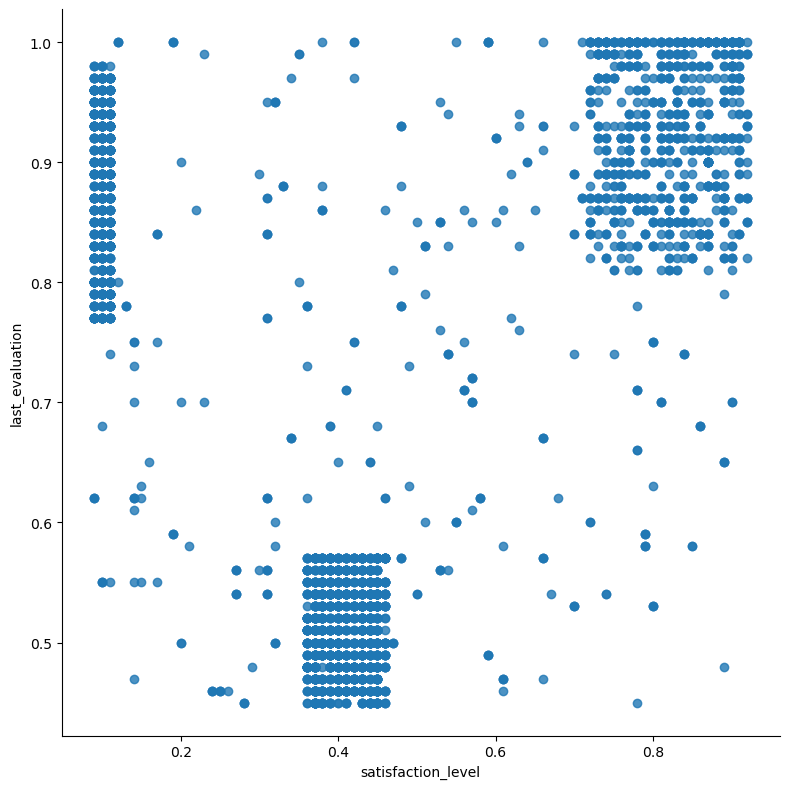

In [161]:
import seaborn as sb

sb.lmplot(x='satisfaction_level',
          y='last_evaluation',
          data=df[df.left==1],
          fit_reg=False,
          height=8
         )

In [ ]:
#it will be more cleare if we add the time_spend_company attriute

In [162]:
fig = px.strip(df[df['left'] == 1], x = 'satisfaction_level', y = 'last_evaluation', color = 'time_spend_company',
               title ="'satisfaction_level' & 'last_evaluation'")
fig.show()

As can be seen on the graph, the employees are not able to make a clear assessment of the company during the first three years of their employment. This, coupled with the other factors, tends to lead to leaving the company after three years.

By the fourth year, their workload increases and their satisfaction decreases.

After the fifth year, they make an assessment, "they will leave or not".

If they decide to continue in the company, they never consider leaving after the sixth year.

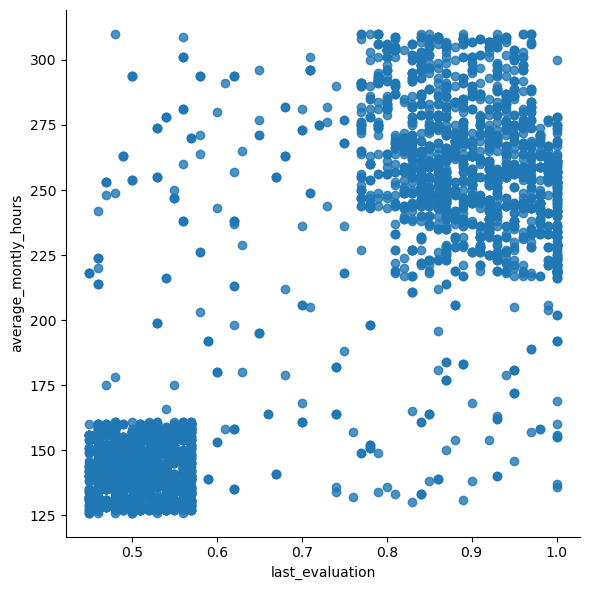

In [163]:
sb.lmplot(x='last_evaluation',
          y='average_montly_hours',
          data=df[df.left==1],
          fit_reg=False,
          height=6
         )

We have two clusters of churned employees: Stars: avg_monthly_hrs > 215 and last_evaluation > 0.75 Slackers: avg_monthly_hrs < 165 and last_evaluation < 0.65

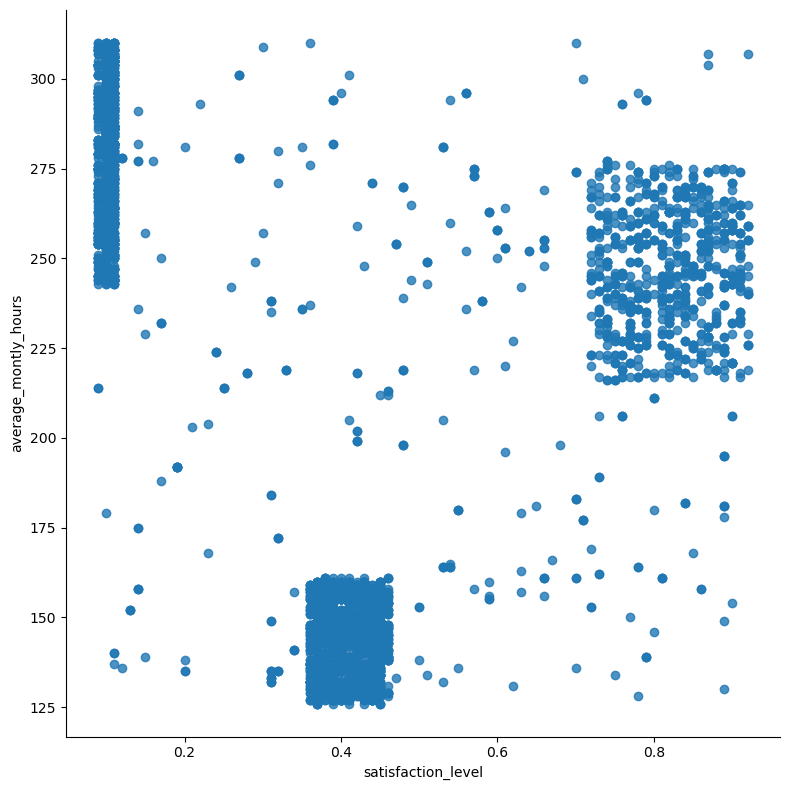

In [164]:
sb.lmplot(x='satisfaction_level',
          y='average_montly_hours',
          data=df[df.left==1],
          fit_reg=False,
          height=6
         )

Workaholics: avg_monthly_hrs > 210 and satisfation > 0.7 Just-a-job: avg_monthly_hrs < 170 Overworked: avg_monthly_hrs > 225 and satisfaction < 0.2


In [ ]:
#Based on these info, we can actually create new features.

In [165]:
df = pd.get_dummies(df, columns=['Departments', 'salary'])

In [166]:
df['underperformer'] = (df.last_evaluation < 0.6).astype(int)
df['unhappy'] = (df.satisfaction_level < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction_level > 0.7)).astype(int)
df['stars'] = ((df.average_montly_hours > 215) & (df.last_evaluation > 0.75)).astype(int)
df['slackers'] = (df.average_montly_hours < 165) & (df.last_evaluation < 0.65).astype(int)
df['workaholic'] = ((df.average_montly_hours > 210) & (df.satisfaction_level > 0.7)).astype(int)
df['justajob'] = (df.average_montly_hours < 170).astype(int)
df['overworked'] = ((df.average_montly_hours> 225) & (df.satisfaction_level < 0.2)).astype(int)

In [167]:
df[['underperformer', 'unhappy', 'overachiever', 'stars', 
    'slackers', 'workaholic', 'justajob', 'overworked']].mean()

underperformer   0.316
unhappy          0.094
overachiever     0.186
stars            0.255
slackers         0.188
workaholic       0.219
justajob         0.340
overworked       0.072
dtype: float64

34% of employees are just-a-job employees — non-inspired and just here for the weekly pay cheque — while only 7% are flat out overworked.

In [169]:
df

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  Departments_IT  Departments_RandD  \
0                          0               0                  0   
1                          0               0                  0   
2                          0               0                  0   
3                          0               0                  0   
4                          0               0                  0   
...                      ...             ...                ...   
14994                      0               0                  0   
14995                      0               0                  0   
14996                      0               0                  0   
14997                      0               0                  0   
14998                      0               0                  0   

       Departments_accounting  Departments_hr  Departments_management  \
0                           0               0                       0   
1                           0               0                       0   
2                           0               0                       0   
3                           0               0                       0   
4                           0               0                       0   
...                       ...             ...                     ...   
14994                       0               0                       0   
14995                       0               0                       0   
14996                       0               0                       0   
14997                       0               0                       0   
14998                       0               0                       0   

       Departments_marketing  Departments_product_mng  Departments_sales  \
0                          0                        0                  1   
1                          0                        0                  1   
2                          0                        0                  1   
3                          0                        0                  1   
4                          0                        0                  1   
...                      ...                      ...                ...   
14994                      0                        0                  0   
14995                      0                        0                  0   
14996                      0   

In [40]:
# numerical= df.drop(['left'], axis = 1).select_dtypes('number').columns

# categorical = df.select_dtypes('object').columns

# print('---------------------')
# print(f'Numerical Columns:  {df[numerical].columns}')
# print(f'Categorical Columns: {df[categorical].columns}')
# print('---------------------')

---------------------
Numerical Columns:  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_IT', 'Departments_RandD',
       'Departments_accounting', 'Departments_hr', 'Departments_management',
       'Departments_marketing', 'Departments_product_mng', 'Departments_sales',
       'Departments_support', 'Departments_technical', 'salary_high',
       'salary_low', 'salary_medium', 'underperformer', 'unhappy',
       'overachiever', 'stars', 'workaholic', 'justajob', 'overworked'],
      dtype='object')
Categorical Columns: Index([], dtype='object')
---------------------


## Data Preprocessing

In [170]:
df1= df
X = df1.drop('left', axis = 1)
y = df1['left']

In [172]:
df1

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  Departments_IT  Departments_RandD  \
0                          0               0                  0   
1                          0               0                  0   
2                          0               0                  0   
3                          0               0                  0   
4                          0               0                  0   
...                      ...             ...                ...   
14994                      0               0                  0   
14995                      0               0                  0   
14996                      0               0                  0   
14997                      0               0                  0   
14998                      0               0                  0   

       Departments_accounting  Departments_hr  Departments_management  \
0                           0               0                       0   
1                           0               0                       0   
2                           0               0                       0   
3                           0               0                       0   
4                           0               0                       0   
...                       ...             ...                     ...   
14994                       0               0                       0   
14995                       0               0                       0   
14996                       0               0                       0   
14997                       0               0                       0   
14998                       0               0                       0   

       Departments_marketing  Departments_product_mng  Departments_sales  \
0                          0                        0                  1   
1                          0                        0                  1   
2                          0                        0                  1   
3                          0                        0                  1   
4                          0                        0                  1   
...                      ...                      ...                ...   
14994                      0                        0                  0   
14995                      0                        0                  0   
14996                      0   

In [ ]:
## Modeling


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

In [174]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
from sklearn.metrics import ConfusionMatrixDisplay

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap="plasma")
    
    print(cm)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [176]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [177]:
GB_model = GradientBoostingClassifier(random_state = 101)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
y_train_pred = GB_model.predict(X_train)

GB_model_f1 = f1_score(y_test, y_pred)
GB_model_acc = accuracy_score(y_test, y_pred)
GB_model_recall = recall_score(y_test, y_pred)
GB_model_auc = roc_auc_score(y_test, y_pred)

GB_Model
------------------
[[3400   29]
 [  74  997]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3429
           1       0.97      0.93      0.95      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.98      0.93      0.95      2500

    accuracy                           0.98     10499
   macro avg       0.98      0.96      0.97     10499
weighted avg       0.98      0.98      0.98     10499



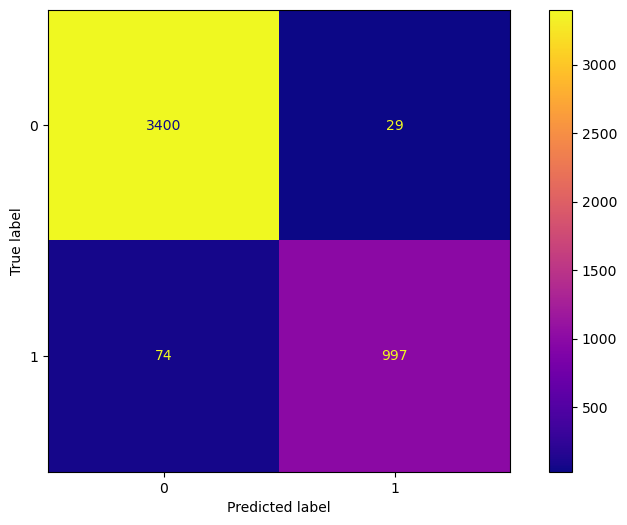

In [178]:
print("GB_Model")
print ("------------------")
eval(GB_model, X_train, X_test)

In [179]:
cprint('GB_model Scores','green', 'on_red')
train_val(y_train, y_train_pred, y_test, y_pred)

GB_model Scores


train_set  test_set
Accuracy       0.978     0.977
Precision      0.978     0.972
Recall         0.930     0.931
f1             0.953     0.951

In [180]:
GB_feature_imp = pd.DataFrame(index=X.columns, data = GB_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
fig = px.bar(GB_feature_imp.sort_values('Importance', ascending = False), x = GB_feature_imp.sort_values('Importance', 
             ascending = False).index, y = 'Importance', title = "Feature Importance", 
             labels = dict(x = "Features", y ="Feature_Importance"))
fig.show()

In [ ]:
#Gradient Boosting Classifier Cross Validation

In [181]:
GB_cv = GradientBoostingClassifier(random_state = 101)
GB_cv_scores = cross_validate(GB_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
GB_cv_scores = pd.DataFrame(GB_cv_scores, index = range(1, 11))
GB_cv_scores.mean()[2:]

test_accuracy    0.976
test_precision   0.972
test_recall      0.927
test_f1          0.949
test_roc_auc     0.988
dtype: float64

In [ ]:
#Gradient Boosting Classifier GridSearchCV

In [182]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1], 
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1], 
              'max_depth':[3, 4, 5, 6]} 

In [183]:
GB_grid = GradientBoostingClassifier(random_state = 101)
GB_grid_model = GridSearchCV(GB_grid, param_grid, scoring = "f1", verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [184]:
GB_grid_model.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=101,
                           subsample=1)

In [185]:
print(colored('\033[1mBest Parameters of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Gradient Boosting Model: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 300, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Gradient Boosting Model: GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=101,
                           subsample=1)


In [186]:
GB_tuned = GradientBoostingClassifier(learning_rate = 0.01,
                                      max_depth = 6, 
                                      n_estimators = 200,
                                      subsample = 0.5,
                                      random_state = 101).fit(X_train, y_train)

In [187]:
y_pred = GB_tuned.predict(X_test)
y_train_pred = GB_tuned.predict(X_train)

GB_tuned_f1 = f1_score(y_test, y_pred)
GB_tuned_acc = accuracy_score(y_test, y_pred)
GB_tuned_recall = recall_score(y_test, y_pred)
GB_tuned_auc = roc_auc_score(y_test, y_pred)

GB_tuned
------------------
[[3416   13]
 [  76  995]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3429
           1       0.99      0.93      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500

Train_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7999
           1       0.99      0.93      0.96      2500

    accuracy                           0.98     10499
   macro avg       0.99      0.97      0.98     10499
weighted avg       0.98      0.98      0.98     10499



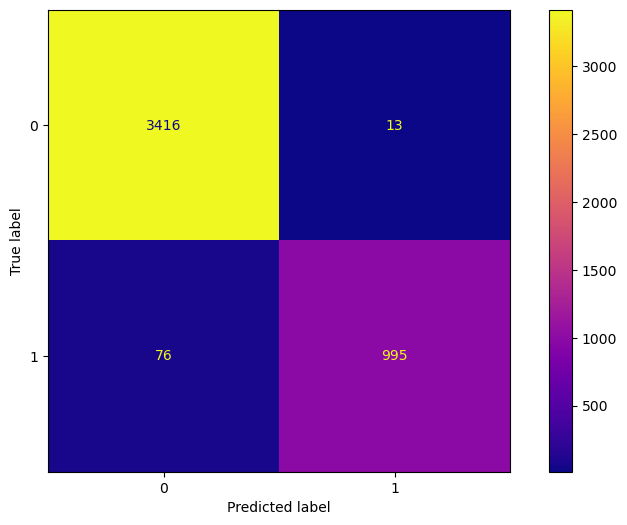

In [188]:
print("GB_tuned")
print ("------------------")
eval(GB_tuned, X_train, X_test)

In [189]:
cprint('GB_tuned Scores','green', 'on_red')
train_val(y_train, y_train_pred, y_test, y_pred)

GB_tuned Scores


train_set  test_set
Accuracy       0.983     0.980
Precision      0.995     0.987
Recall         0.934     0.929
f1             0.964     0.957

In [190]:
cprint('GB_tuned Predictions','green', 'on_red')
GB_Pred = {"Actual": y_test, "GB_Pred":y_pred}
GB_Pred = pd.DataFrame.from_dict(GB_Pred)
GB_Pred.head()

GB_tuned Predictions


Actual  GB_Pred
5154        0        0
14201       0        0
12040       1        1
10175       0        0
3274        0        0

In [191]:
cprint('Predictions','green', 'on_red')
Model_Preds = GB_Pred
Model_Preds.head()

Predictions


Actual  GB_Pred
5154        0        0
14201       0        0
12040       1        1
10175       0        0
3274        0        0

## LOGISTIC REGRESSION

Logistic Regression Model
-------------------------
[[2973  456]
 [  75  996]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      3429
           1       0.69      0.93      0.79      1071

    accuracy                           0.88      4500
   macro avg       0.83      0.90      0.85      4500
weighted avg       0.91      0.88      0.89      4500

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7999
           1       0.69      0.92      0.79      2500

    accuracy                           0.88     10499
   macro avg       0.83      0.90      0.85     10499
weighted avg       0.90      0.88      0.89     10499

Logistic Regression Scores
F1 Score on Test Set: 0.789536266349584
Accuracy on Test Set: 0.882
Recall on Test Set: 0.9299719887955182
ROC AUC Score on Test Set: 0.8984943058588265


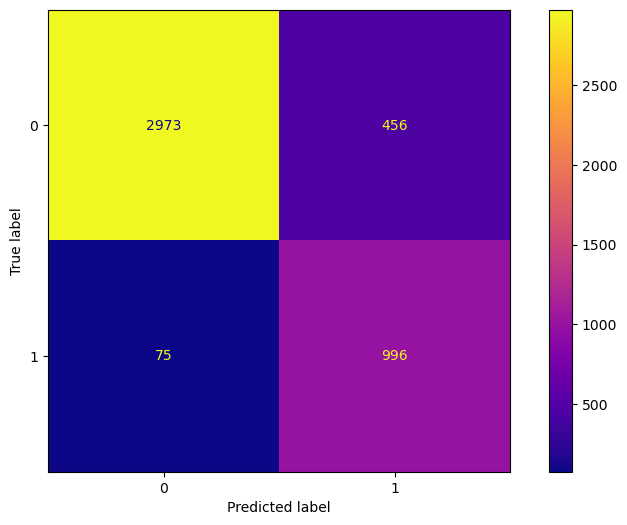

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score

# Training the Logistic Regression Model
log_reg_model = LogisticRegression(class_weight="balanced", random_state=101, max_iter=10000)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
y_train_pred = log_reg_model.predict(X_train)

# Evaluating the model
log_reg_model_f1 = f1_score(y_test, y_pred)
log_reg_model_acc = accuracy_score(y_test, y_pred)
log_reg_model_recall = recall_score(y_test, y_pred)
log_reg_model_auc = roc_auc_score(y_test, y_pred)

print("Logistic Regression Model")
print("-------------------------")
# Assuming eval is a function you defined earlier for evaluation
eval(log_reg_model, X_train, X_test)

# Print the scores
print('Logistic Regression Scores')
print("F1 Score on Test Set:", log_reg_model_f1)
print("Accuracy on Test Set:", log_reg_model_acc)
print("Recall on Test Set:", log_reg_model_recall)
print("ROC AUC Score on Test Set:", log_reg_model_auc)


In [193]:
cprint('LR_model Scores','green', 'on_red')
train_val(y_train, y_train_pred, y_test, y_pred)

LR_model Scores


train_set  test_set
Accuracy       0.883     0.882
Precision      0.692     0.686
Recall         0.918     0.930
f1             0.789     0.790

In [194]:
log_reg_model = LogisticRegression(class_weight="balanced", random_state=101, max_iter=10000)
log_reg_model.fit(X_train, y_train)

log_reg_feature_imp = pd.DataFrame(index=X.columns, data=np.abs(log_reg_model.coef_).reshape(-1), columns=['Importance']).sort_values("Importance", ascending=False)

fig = px.bar(log_reg_feature_imp.sort_values('Importance', ascending=False), x=log_reg_feature_imp.sort_values('Importance', 
             ascending=False).index, y='Importance', title="Feature Importance", 
             labels=dict(x="Features", y="Feature_Importance"))
fig.show()


In [195]:
log_reg_cv = LogisticRegression(class_weight="balanced", random_state=101)
log_reg_cv_scores = cross_validate(log_reg_cv, X_train, y_train, 
                              scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)
log_reg_cv_scores = pd.DataFrame(log_reg_cv_scores, index=range(1, 11))
print(log_reg_cv_scores.mean()[2:])


test_accuracy    0.882
test_precision   0.690
test_recall      0.917
test_f1          0.787
test_roc_auc     0.950
dtype: float64


In [196]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_grid = LogisticRegression(class_weight='balanced', random_state=101)
log_reg_grid_model = GridSearchCV(estimator=log_reg_grid, 
                             param_grid=param_grid, 
                             scoring="recall", 
                             n_jobs=-1, verbose=2)
log_reg_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/Arunabho/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Arunabho/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Arunabho/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Arunabho/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Arunabho/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Arunabho/anaconda3/lib/python3.11/site-pack

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          random_state=101),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=2)

In [197]:
log_reg_grid_model.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   random_state=101, solver='liblinear')

In [198]:
print(colored('\033[1mBest Parameters of GridSearchCV for logistic regression Model:\033[0m', 'blue'), colored(log_reg_grid_model.best_params_, 'red'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for logistic regression Model:\033[0m', 'blue'), colored(log_reg_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for logistic regression Model: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for logistic regression Model: LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   random_state=101, solver='liblinear')


In [199]:
LR_tuned = LogisticRegression(C=0.01, 
                              penalty='l1', 
                              solver='liblinear', 
                              class_weight='balanced', 
                              random_state=101).fit(X_train, y_train)


In [200]:
y_pred = LR_tuned.predict(X_test)
y_train_pred = LR_tuned.predict(X_train)

LR_tuned_f1 = f1_score(y_test, y_pred)
LR_tuned_acc = accuracy_score(y_test, y_pred)
LR_tuned_recall = recall_score(y_test, y_pred)
LR_tuned_auc = roc_auc_score(y_test, y_pred)

LR_tuned
------------------
[[2840  589]
 [  68 1003]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      3429
           1       0.63      0.94      0.75      1071

    accuracy                           0.85      4500
   macro avg       0.80      0.88      0.82      4500
weighted avg       0.89      0.85      0.86      4500

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      7999
           1       0.63      0.92      0.75      2500

    accuracy                           0.85     10499
   macro avg       0.80      0.88      0.82     10499
weighted avg       0.89      0.85      0.86     10499



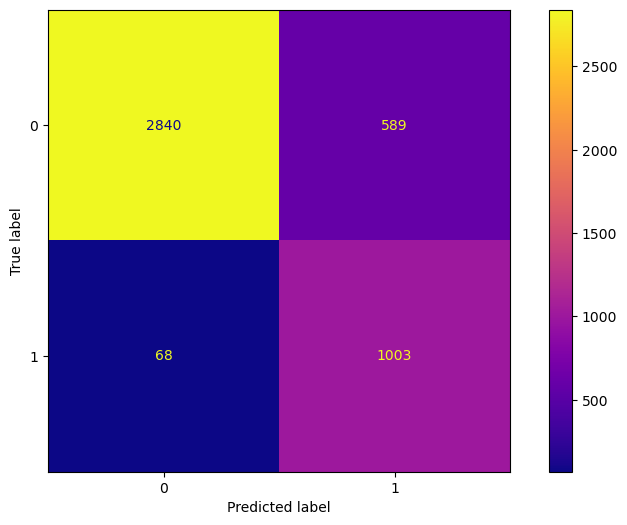

In [201]:
print("LR_tuned")
print("------------------")
eval(LR_tuned, X_train, X_test)

In [202]:
cprint('LR_tuned Scores','green', 'on_red')
train_val(y_train, y_train_pred, y_test, y_pred)

LR_tuned Scores


train_set  test_set
Accuracy       0.854     0.854
Precision      0.634     0.630
Recall         0.922     0.937
f1             0.751     0.753

In [ ]:
#NOW for ROC-AUC curve

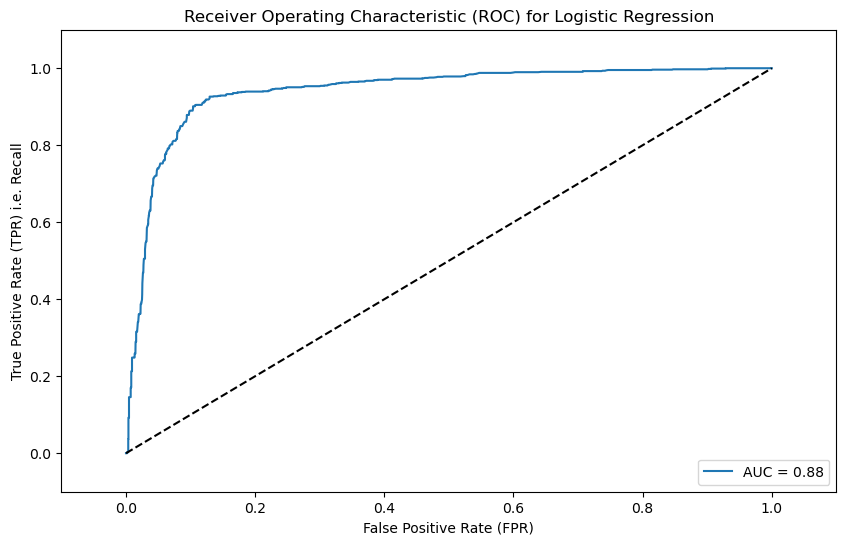

AUROC for Logistic Regression: 0.882368870557847


In [203]:
# Compute the ROC curve for LR_tuned
fpr, tpr, thresholds = roc_curve(y_test, LR_tuned.predict_proba(X_test)[:,1])

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.plot(fpr, tpr, label='AUC = %0.2f' % LR_tuned_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate (TPR) i.e. Recall')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

# AUROC score for LR_tuned
print('AUROC for Logistic Regression:', LR_tuned_auc)

In [204]:
cprint('LR_tuned Predictions','green', 'on_red')
LR_Pred = {"Actual": y_test, "LR_Pred":y_pred}
LR_Pred = pd.DataFrame.from_dict(LR_Pred)
LR_Pred.head()

LR_tuned Predictions


Actual  LR_Pred
5154        0        0
14201       0        0
12040       1        1
10175       0        0
3274        0        0

In [205]:
cprint('Predictions','green', 'on_red')
LR_Pred.drop("Actual", axis = 1, inplace = True)
Model_Preds = pd.merge(Model_Preds, LR_Pred, left_index = True, right_index = True)
Model_Preds.head()

Predictions


Actual  GB_Pred  LR_Pred
5154        0        0        0
14201       0        0        0
12040       1        1        1
10175       0        0        0
3274        0        0        0

## Random Forest Classifier

In [206]:
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 101)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
y_train_pred = RF_model.predict(X_train)

RF_model_f1 = f1_score(y_test, y_pred)
RF_model_acc = accuracy_score(y_test, y_pred)
RF_model_recall = recall_score(y_test, y_pred)
RF_model_auc = roc_auc_score(y_test, y_pred)

RF_Model
------------------
[[3421    8]
 [  47 1024]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



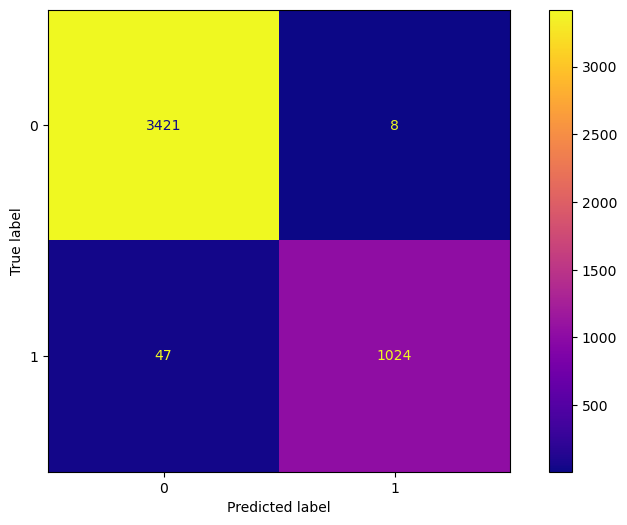

In [207]:
print("RF_Model")
print ("------------------")
eval(RF_model, X_train, X_test)

In [208]:
cprint('RF_model Scores','green', 'on_red')
train_val(y_train, y_train_pred, y_test, y_pred)

RF_model Scores


train_set  test_set
Accuracy       1.000     0.988
Precision      1.000     0.992
Recall         1.000     0.956
f1             1.000     0.974

In [209]:
RF_feature_imp = pd.DataFrame(index=X.columns, data = RF_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
fig = px.bar(RF_feature_imp.sort_values('Importance', ascending = False), x = RF_feature_imp.sort_values('Importance', 
             ascending = False).index, y = 'Importance', title = "Feature Importance", 
             labels = dict(x = "Features", y ="Feature_Importance"))
fig.show()

In [ ]:
#Random Forest Classifier Cross Validation

In [210]:
RF_cv = RandomForestClassifier(class_weight = "balanced", random_state = 101)
RF_cv_scores = cross_validate(RF_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
RF_cv_scores = pd.DataFrame(RF_cv_scores, index = range(1, 11))
RF_cv_scores.mean()[2:]

test_accuracy    0.990
test_precision   0.989
test_recall      0.968
test_f1          0.978
test_roc_auc     0.993
dtype: float64

In [ ]:
#Random Forest Classifier GridSearchCV

In [211]:
param_grid = {'n_estimators' : [50, 100, 300],
              'max_features' : [2, 3, 4],
              'max_depth' : [3, 5, 7, 9],
              'min_samples_split' : [2, 5, 8]}

In [212]:
RF_grid = RandomForestClassifier(class_weight = 'balanced', random_state = 101)
RF_grid_model = GridSearchCV(estimator = RF_grid, 
                             param_grid = param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2)
RF_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [2, 3, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 300]},
             scoring='recall', verbose=2)

In [213]:
RF_grid_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=4,
                       n_estimators=50, random_state=101)

In [214]:
print(colored('\033[1mBest Parameters of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'red'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Random Forest Model: {'max_depth': 9, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Random Forest Model: RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=4,
                       n_estimators=50, random_state=101)


In [215]:
RF_tuned = RandomForestClassifier(class_weight = 'balanced',
                                  max_depth = 3,
                                  max_features = 4,
                                  n_estimators = 300,
                                  min_samples_split = 2,
                                  random_state = 101).fit(X_train, y_train)

In [216]:
y_pred = RF_tuned.predict(X_test)
y_train_pred = RF_tuned.predict(X_train)

RF_tuned_f1 = f1_score(y_test, y_pred)
RF_tuned_acc = accuracy_score(y_test, y_pred)
RF_tuned_recall = recall_score(y_test, y_pred)
RF_tuned_auc = roc_auc_score(y_test, y_pred)

RF_tuned
------------------
[[3272  157]
 [  81  990]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3429
           1       0.86      0.92      0.89      1071

    accuracy                           0.95      4500
   macro avg       0.92      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7999
           1       0.88      0.92      0.90      2500

    accuracy                           0.95     10499
   macro avg       0.92      0.94      0.93     10499
weighted avg       0.95      0.95      0.95     10499



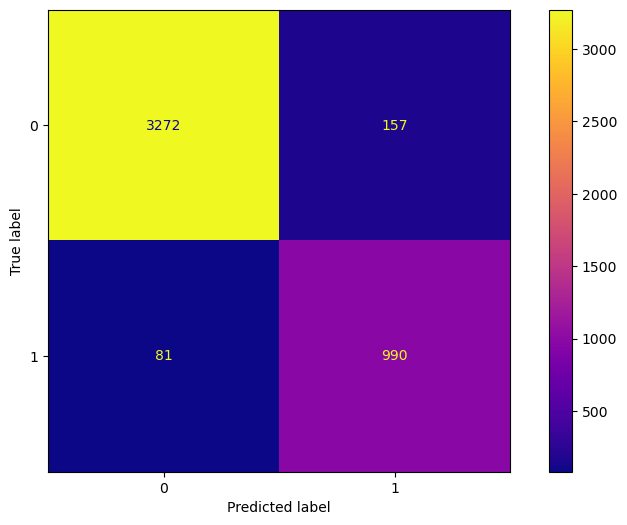

In [217]:
print("RF_tuned")
print ("------------------")
eval(RF_tuned, X_train, X_test)

In [218]:
cprint('RF_tuned Scores','green', 'on_red')
train_val(y_train, y_train_pred, y_test, y_pred)

RF_tuned Scores


train_set  test_set
Accuracy       0.949     0.947
Precision      0.875     0.863
Recall         0.916     0.924
f1             0.895     0.893

Random Forest Classifier ROC (Receiver Operating Curve) and AUC (Area Under Curve)

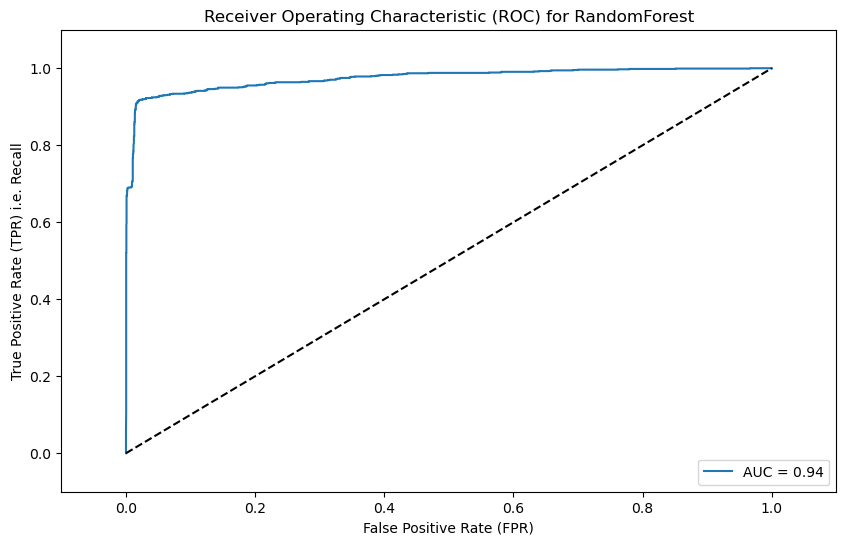

AUROC for RandomForest: 0.9392919022377105


In [219]:
# Compute the ROC curve for RF_tuned
fpr, tpr, thresholds = roc_curve(y_test, RF_tuned.predict_proba(X_test)[:,1]) 

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic (ROC) for RandomForest')
plt.plot(fpr, tpr, label='AUC = %0.2f' % RF_tuned_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate (TPR) i.e. Recall')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

# AUROC score for RF_tuned
print('AUROC for RandomForest:', RF_tuned_auc)

In [ ]:
## Prediction

In [220]:
cprint('RF_tuned Predictions','green', 'on_red')
RF_Pred = {"Actual": y_test, "RF_Pred":y_pred}
RF_Pred = pd.DataFrame.from_dict(RF_Pred)
RF_Pred.head()

RF_tuned Predictions


Actual  RF_Pred
5154        0        0
14201       0        0
12040       1        1
10175       0        0
3274        0        0

In [221]:
cprint('Predictions','green', 'on_red')
RF_Pred.drop("Actual", axis = 1, inplace = True)
Model_Preds = pd.merge(Model_Preds, RF_Pred, left_index = True, right_index = True)
Model_Preds.head()

Predictions


Actual  GB_Pred  LR_Pred  RF_Pred
5154        0        0        0        0
14201       0        0        0        0
12040       1        1        1        1
10175       0        0        0        0
3274        0        0        0        0

## model_comparisons

In [222]:
compare = pd.DataFrame({"Model": ["GB_model", "GB_tuned", "RF_model", "RF_tuned", "log_reg_model", "LR_tuned"],
                        
                        "F1_Score": [GB_model_f1, GB_tuned_f1, RF_model_f1, RF_tuned_f1, log_reg_model_f1, LR_tuned_f1],
                                                 
                        "Accuracy_Score": [GB_model_acc, GB_tuned_acc, RF_model_acc, RF_tuned_acc, log_reg_model_acc, LR_tuned_acc],
                        
                        "Recall_Score": [GB_model_recall, GB_tuned_recall, RF_model_recall, RF_tuned_recall, log_reg_model_recall, LR_tuned_recall],
                       
                        "ROC_AUC_Score": [GB_model_auc, GB_tuned_auc, RF_model_auc, RF_tuned_auc, log_reg_model_auc, LR_tuned_auc]})

compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()

compare = compare.sort_values(by="Accuracy_Score", ascending=True)
fig = px.bar(compare, x = "Accuracy_Score", y = "Model", title = "Accuracy_Score")
fig.show()

compare = compare.sort_values(by="ROC_AUC_Score", ascending=True)
fig = px.bar(compare, x = "ROC_AUC_Score", y = "Model", title = "ROC_AUC_Score")
fig.show()

In [223]:
cprint('Scores','green', 'on_red')
compare.T

Scores


5              4         3         0         1  \
Model           LR_tuned  log_reg_model  RF_tuned  GB_model  GB_tuned   
F1_Score           0.753          0.790     0.893     0.951     0.957   
Accuracy_Score     0.854          0.882     0.947     0.977     0.980   
Recall_Score       0.937          0.930     0.924     0.931     0.929   
ROC_AUC_Score      0.882          0.898     0.939     0.961     0.963   

                       2  
Model           RF_model  
F1_Score           0.974  
Accuracy_Score     0.988  
Recall_Score       0.956  
ROC_AUC_Score      0.977

## Deep Learning


We start off by setting up the hyper parameters for the model. We will use an epoch of 100 and a batch size of 100. We will set verbose to one so that we can see the training results. The number of unique output classes is two. We will create hidden layers for 128 units. We will also do a validation split of 0.2. This means 20% of the data will be used for validation while building the model.

In [224]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

EPOCHS = 100
BATCH_SIZE = 100
VERBOSE = 1
NB_CLASSES = 2
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

y_train_encoded = to_categorical(y_train, num_classes=NB_CLASSES)

model = tf.keras.models.Sequential()


model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(28,),
                             name='Dense-Layer-1',
                             activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                             name='Dense-Layer-2',
                             activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Final',
                             activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,
          y_train_encoded,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

Epoch 1/100
84/84 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8694 - val_loss: 0.2352 - val_accuracy: 0.9271
Epoch 2/100
84/84 [==============================] - 0s 862us/step - loss: 0.2061 - accuracy: 0.9351 - val_loss: 0.1868 - val_accuracy: 0.9390
Epoch 3/100
84/84 [==============================] - 0s 978us/step - loss: 0.1724 - accuracy: 0.9493 - val_loss: 0.1604 - val_accuracy: 0.9505
Epoch 4/100
84/84 [==============================] - 0s 980us/step - loss: 0.1537 - accuracy: 0.9543 - val_loss: 0.1453 - val_accuracy: 0.9562
Epoch 5/100
84/84 [==============================] - 0s 917us/step - loss: 0.1426 - accuracy: 0.9568 - val_loss: 0.1433 - val_accuracy: 0.9590
Epoch 6/100
84/84 [==============================] - 0s 890us/step - loss: 0.1364 - accuracy: 0.9571 - val_loss: 0.1437 - val_accuracy: 0.9576
Epoch 7/100
84/84 [==============================] - 0s 959us/step - loss: 0.1255 - accuracy: 0.9623 - val_loss: 0.1303 - val_accuracy: 0.9619
E

In [ ]:
# Doing a k-fold validation

In [225]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Model function
def make_classifier(input_shape):
    classifier = Sequential()
    classifier.add(Dense(9, kernel_initializer="uniform", activation="relu", input_dim=input_shape))
    classifier.add(Dense(2, kernel_initializer="uniform", activation="softmax"))  # Adjusted here
    classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  # Adjusted here
    return classifier

# Constants
EPOCHS = 1
BATCH_SIZE = 10
FOLDS = 10

# Convert one-hot encoded labels back to integer labels for stratified splitting
y_train_int = np.argmax(y_train_encoded, axis=1)

kfold = StratifiedKFold(n_splits=FOLDS, shuffle=True)

scores = []


for train, test in kfold.split(X_train, y_train_int):  # Using y_train_int for splitting
    # Create a new model for each fold
    model = make_classifier(X_train.shape[1])
    
    # Train the model on the current fold using the numpy arrays
    model.fit(X_train[train], y_train_encoded[train], epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Evaluate the model on the validation set of the current fold using the numpy arrays
    _, accuracy = model.evaluate(X_train[test], y_train_encoded[test], verbose=0)
    scores.append(accuracy)

# Convert scores to numpy array to compute mean and standard deviation
accuracies = np.array(scores)
mean = accuracies.mean()

print(f"Mean Accuracy: {mean}")

Mean Accuracy: 0.8958890557289123


In [226]:
variance = accuracies.var()
variance

0.00048754045585454266

[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=200, subsample=1; total time=   1.5s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=300, subsample=1; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=300, subsample=0.5; total time=   

[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=1; total time=   0.8s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=200, subsample=1; total time=   1.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=300, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s

[CV] END learning_rate=0.1, max_depth=6, max_features=3, n_estimators=300, subsample=1; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=4, n_estimators=100, subsample=1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=4, n_estimators=200, subsample=1; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=4, n_estimators=300, subsample=1; total time=   1.2s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] 

[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=1; total time=   0.9s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=300, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=300, subsample=1; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=300, subsample=1; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=300, subsample=1; total time=   0.5s
[

[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=300, subsample=1; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, max_features=3, n_estimators=300, subsample=0.5; total time=   

[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=1; total time=   0.9s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, max_features=2, n_estimators=100, subsample=1; total time=   0.2

In [ ]:
# adding Dropout feature for regularization

In [227]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=28))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

## HyperParameter tuning

In [228]:
y_train_1d = np.argmax(y_train_encoded, axis=1)

In [229]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.utils.validation import check_is_fitted


class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='adam', batch_size=32, epochs=10):
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.epochs = epochs

    def make_classifier(self):
        model = Sequential()
        model.add(Dense(9, kernel_initializer="uniform", activation="relu", input_dim=28))
        model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
        model.compile(optimizer=self.optimizer, loss="binary_crossentropy", metrics=["accuracy"])
        return model

    def fit(self, X, y):
        self.classes_ = unique_labels(y)
        self.model_ = self.make_classifier()
        self.model_.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        check_is_fitted(self, ['model_', 'classes_'])
        X = check_array(X, accept_sparse=True, allow_nd=True)
        return (self.model_.predict(X) > 0.5).astype(int).flatten()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

params = {
    'batch_size': [20, 35],
    'epochs': [2, 3],
    'optimizer': ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator=CustomKerasClassifier(),
                           param_grid=params,
                           scoring="accuracy",
                           cv=2)

grid_search = grid_search.fit(X_train, y_train_1d)

165/165 [==============================] - 0s 254us/step


In [230]:
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [231]:
best_param

{'batch_size': 20, 'epochs': 3, 'optimizer': 'adam'}

In [232]:
best_accuracy

0.8993231545237641

It seems that the neural network was not better than randomforest, atleast based on the accuracy data.

In [ ]:
#Let's try to make a single prediction based on the employee details.

In [233]:
employee_details = [
    # satisfaction_level
    0.380,
    # last_evaluation
    0.530,
    # number_project
    2,
    # average_montly_hours
    157,
    # time_spend_company
    3,
    # Work_accident
    0,
    # promotion_last_5years
    0,
    # Departments_IT
    0,
    # Departments_RandD
    0,
    # Departments_accounting
    0,
    # Departments_hr
    0,
    # Departments_management
    0,
    # Departments_marketing
    0,
    # Departments_product_mng
    0,
    # Departments_sales
    1,
    # Departments_support
    0,
    # Departments_technical
    0,
    # salary_high
    0,
    # salary_low
    1,
    # salary_medium
    0,
    # underperformer
    1,
    # unhappy
    0,
    # overachiever
    0,
    # stars
    0,
    # slackers
    1,
    # workaholic
    0,
    # justajob
    1,
    # overworked
    0
]

In [234]:
employee_details_np = np.array(employee_details).reshape(1, -1)
scaled_employee_details = scaler.transform(employee_details_np)

probability_of_leaving = classifier.predict(scaled_employee_details)[0][0]

print(f"Probability of the employee leaving: {probability_of_leaving * 100:.2f}%")

1/1 [==============================] - 0s 33ms/step
Probability of the employee leaving: 50.16%


In [ ]:
#As we can see, the model is predicting the probability of the employee leaving based on the predictions.

## Model stacking

In [238]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import StackingClassifier

class NeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim=None, epochs=10, batch_size=32):
        self.input_dim = input_dim
        self.epochs = epochs
        self.batch_size = batch_size
        
        self.model = Sequential()
        if self.input_dim:
            self._init_model()

    def _init_model(self):
        self.model.add(Dense(9, kernel_initializer="uniform", activation="relu", input_dim=self.input_dim))
        self.model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        if self.input_dim is None:
            self.input_dim = X.shape[1]
            self._init_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int).flatten()

nn_model = NeuralNetworkClassifier(input_dim=X_train.shape[1], epochs=10, batch_size=32)

# Check if the model works standalone
nn_model.fit(X_train, y_train)
predictions = nn_model.predict(X_test)

# Now you can use `nn_model` as a base learner in stacking.


base_learners = [
    ('rf', RF_model),
    ('rf_tuned', RF_tuned),
    ('gb', GB_model),
    ('gb_tuned', GB_tuned),
    ('LR', log_reg_model),
    ('LR_tuned', LR_tuned),
    ('nn', nn_model)
]


# Meta learner (Final estimator)
meta_learner = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predictions
y_pred = stacking_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.2f}")

141/141 [==============================] - 0s 1ms/step
Stacking Model Accuracy: 0.99


Model selection and Conclusion

It is worth noting that the best accuracy in deep learning model is inferior than the traditional machine learning model. It can be inferred that as the dataset is not big enough, the neural network is not able to extract valuable insight. 